Exo 1: Display a choropleth map with Boys/girls total births disparity

In [ ]:
pip install geopandas

     |████████████████████████████████| 972kB 8.1MB/s 
     |████████████████████████████████| 10.9MB 16.9MB/s 
     |████████████████████████████████| 14.8MB 330kB/s 


In [ ]:
import geopandas as gpd
map_df = gpd.read_file('departements-20140306-5m.shp')
map_df

,code_insee,nom,nuts3,wikipedia,geometry
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ..."
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ..."
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ..."
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ..."
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ..."
...,...,...,...,...,...
96,971,Guadeloupe,FR910,fr:Guadeloupe,"MULTIPOLYGON (((-61.61403 15.83955, -61.61399 ..."
97,972,Martinique,FR920,fr:Martinique,"MULTIPOLYGON (((-60.86880 14.39091, -60.86875 ..."
98,973,Guyane,FR930,fr:Guyane,"MULTIPOLYGON (((-52.58463 5.28309, -52.58348 5..."
99,974,b'La R\xe9union',FR940,b'fr:La R\xe9union',"MULTIPOLYGON (((55.77886 -21.36291, 55.77889 -..."


In [ ]:
# map_df[map_df.code_insee.str.contains("\d\d\d")==True]
map_df[map_df.code_insee.str.contains("\d\d\d")]

,code_insee,nom,nuts3,wikipedia,geometry
96,971,Guadeloupe,FR910,fr:Guadeloupe,"MULTIPOLYGON (((-61.61403 15.83955, -61.61399 ..."
97,972,Martinique,FR920,fr:Martinique,"MULTIPOLYGON (((-60.86880 14.39091, -60.86875 ..."
98,973,Guyane,FR930,fr:Guyane,"MULTIPOLYGON (((-52.58463 5.28309, -52.58348 5..."
99,974,b'La R\xe9union',FR940,b'fr:La R\xe9union',"MULTIPOLYGON (((55.77886 -21.36291, 55.77889 -..."
100,976,Mayotte,None,fr:Mayotte,"MULTIPOLYGON (((45.13667 -13.00398, 45.13690 -..."


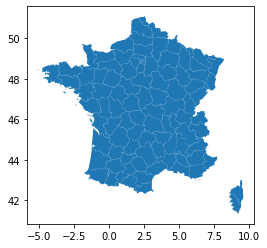

In [ ]:
# LET'S SEPARATE DOM TOM FROM MAINLAND USING contains and REGEXP syntax
map_df=map_df[map_df.code_insee.str.contains("\d\d\d")==False]
map_df.plot()

# FILTER SYNTAX FOUND HERE : https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column

In [ ]:
map_df

,code_insee,nom,nuts3,wikipedia,geometry
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ..."
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ..."
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ..."
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ..."
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ..."
...,...,...,...,...,...
91,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ..."
92,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ..."
93,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ..."
94,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ..."


In [ ]:
import pandas as pd
prenoms= pd.read_csv("dpt2018.csv",sep=";")
prenoms

,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,27
1,1,AADAM,XXXX,XX,27
2,1,AADEL,XXXX,XX,55
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3
...,...,...,...,...,...
3624989,2,ÉYA,2014,69,3
3624990,2,ÉYA,XXXX,XX,23
3624991,2,ÏNAYA,XXXX,XX,21
3624992,2,ÖZGE,XXXX,XX,30


In [ ]:
prenoms_boys = prenoms[prenoms.sexe == 1]
dpt_sum_boys=prenoms_boys.groupby("dpt").nombre.sum()
dpt_sum_boys

dpt
01      222361
02      428461
03      253694
04       55230
05       65182
        ...   
971     338105
972     333358
973      91719
974     612562
XX     3684762
Name: nombre, Length: 100, dtype: int64

In [ ]:
prenoms_girls = prenoms[prenoms.sexe == 2]
dpt_sum_girls=prenoms_girls.groupby("dpt").nombre.sum()
dpt_sum_girls

dpt
01      215543
02      414479
03      244675
04       50509
05       60889
        ...   
971     302549
972     304469
973      77466
974     579445
XX     4576926
Name: nombre, Length: 100, dtype: int64

In [ ]:
dpt_disparity_ratio = dpt_sum_boys / dpt_sum_girls
dpt_disparity_ratio

dpt
01     1.031632
02     1.033734
03     1.036861
04     1.093468
05     1.070505
         ...   
971    1.117521
972    1.094883
973    1.183990
974    1.057153
XX     0.805074
Name: nombre, Length: 100, dtype: float64

In [ ]:
dpt_disparity_ratio=dpt_disparity_ratio.reset_index()
dpt_disparity_ratio

,dpt,nombre
0,01,1.031632
1,02,1.033734
2,03,1.036861
3,04,1.093468
4,05,1.070505
...,...,...
95,971,1.117521
96,972,1.094883
97,973,1.183990
98,974,1.057153


In [ ]:
dpt_disparity_ratio["code_insee"]=dpt_disparity_ratio.dpt
dpt_disparity_ratio

,dpt,nombre,code_insee
0,01,1.031632,01
1,02,1.033734,02
2,03,1.036861,03
3,04,1.093468,04
4,05,1.070505,05
...,...,...,...
95,971,1.117521,971
96,972,1.094883,972
97,973,1.183990,973
98,974,1.057153,974


In [ ]:
merged = map_df.merge(dpt_disparity_ratio, on='code_insee')
merged

,code_insee,nom,nuts3,wikipedia,geometry,dpt,nombre
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",01,1.031632
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",02,1.033734
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ...",03,1.036861
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ...",04,1.093468
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ...",05,1.070505
...,...,...,...,...,...,...,...
89,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ...",91,1.086272
90,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ...",92,1.072948
91,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",93,1.075698
92,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",94,1.074076


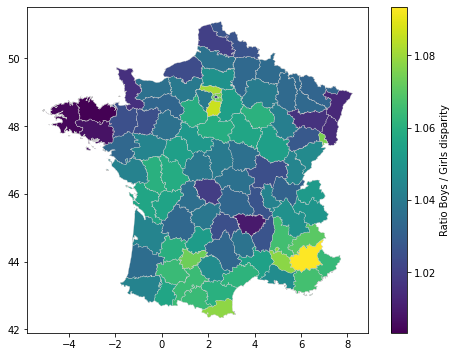

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(8, 6))

merged.plot(column="nombre",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Ratio Boys / Girls disparity"})

Exo 2: Display a choropleth map with number of girls named Emma born in 2018

In [ ]:
prenoms_emma=prenoms[prenoms.preusuel == "EMMA"]
prenoms_emma=prenoms_emma[prenoms_emma.annais == "2018"]
prenoms_emma

,sexe,preusuel,annais,dpt,nombre
2295674,2,EMMA,2018,01,37
2295675,2,EMMA,2018,02,38
2295676,2,EMMA,2018,03,28
2295677,2,EMMA,2018,04,6
2295678,2,EMMA,2018,05,10
...,...,...,...,...,...
2295767,2,EMMA,2018,95,79
2295768,2,EMMA,2018,971,17
2295769,2,EMMA,2018,972,11
2295770,2,EMMA,2018,973,11


In [ ]:
prenoms_emma=prenoms_emma.reset_index()
prenoms_emma["code_insee"]=prenoms_emma.dpt
prenoms_emma

,level_0,index,sexe,preusuel,annais,dpt,nombre,code_insee
0,0,2295674,2,EMMA,2018,01,37,01
1,1,2295675,2,EMMA,2018,02,38,02
2,2,2295676,2,EMMA,2018,03,28,03
3,3,2295677,2,EMMA,2018,04,6,04
4,4,2295678,2,EMMA,2018,05,10,05
...,...,...,...,...,...,...,...,...
93,93,2295767,2,EMMA,2018,95,79,95
94,94,2295768,2,EMMA,2018,971,17,971
95,95,2295769,2,EMMA,2018,972,11,972
96,96,2295770,2,EMMA,2018,973,11,973


In [ ]:
merged2 = map_df.merge(prenoms_emma, on='code_insee')
merged2

,code_insee,nom,nuts3,wikipedia,geometry,level_0,index,sexe,preusuel,annais,dpt,nombre
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",0,2295674,2,EMMA,2018,01,37
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",1,2295675,2,EMMA,2018,02,38
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ...",2,2295676,2,EMMA,2018,03,28
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ...",3,2295677,2,EMMA,2018,04,6
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ...",4,2295678,2,EMMA,2018,05,10
...,...,...,...,...,...,...,...,...,...,...,...,...
88,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ...",89,2295763,2,EMMA,2018,91,75
89,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ...",90,2295764,2,EMMA,2018,92,142
90,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",91,2295765,2,EMMA,2018,93,48
91,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",92,2295766,2,EMMA,2018,94,102


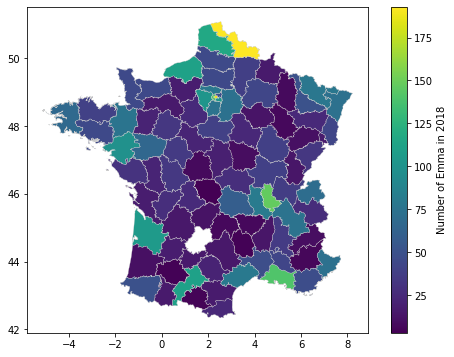

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 6))

merged2.plot(column="nombre",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Number of Emma in 2018"})

Exo 3: Emma but weighted

In [ ]:
pop_dep_2018 = pd.read_csv("population-francaise-par-departement-2018.csv",sep=";", usecols = [0,1,2])
pop_dep_2018

,Code Département,Département,Population
0,11,Aude,370245
1,25,Doubs,540890
2,60,Oise,829839
3,66,Pyrénées-Orientales,482131
4,85,Vendée,680191
...,...,...,...
96,43,Haute-Loire,227444
97,72,Sarthe,566901
98,39,Jura,259393
99,48,Lozère,75463


In [ ]:
pop_total = pop_dep_2018.Population.sum()
pop_total

67186638

In [ ]:
ratio = pop_dep_2018.Population / pop_total
ratio

0      0.005511
1      0.008051
2      0.012351
3      0.007176
4      0.010124
         ...   
96     0.003385
97     0.008438
98     0.003861
99     0.001123
100    0.005526
Name: Population, Length: 101, dtype: float64

In [ ]:
pop_dep_2018.Population = ratio
pop_dep_2018

,Code Département,Département,Population
0,11,Aude,0.005511
1,25,Doubs,0.008051
2,60,Oise,0.012351
3,66,Pyrénées-Orientales,0.007176
4,85,Vendée,0.010124
...,...,...,...
96,43,Haute-Loire,0.003385
97,72,Sarthe,0.008438
98,39,Jura,0.003861
99,48,Lozère,0.001123


In [ ]:
pop_dep_2018.sort_values(by=['Code Département'])
pop_dep_2018

,Code Département,Département,Population
0,11,Aude,0.005511
1,25,Doubs,0.008051
2,60,Oise,0.012351
3,66,Pyrénées-Orientales,0.007176
4,85,Vendée,0.010124
...,...,...,...
96,43,Haute-Loire,0.003385
97,72,Sarthe,0.008438
98,39,Jura,0.003861
99,48,Lozère,0.001123


In [ ]:
prenoms_emma_wei=prenoms_emma
prenoms_emma_wei.nombre = prenoms_emma_wei.nombre * pop_dep_2018.Population
prenoms_emma_wei

,level_0,index,sexe,preusuel,annais,dpt,nombre,code_insee
0,0,2295674,2,EMMA,2018,01,0.001124,01
1,1,2295675,2,EMMA,2018,02,0.002463,02
2,2,2295676,2,EMMA,2018,03,0.004271,03
3,3,2295677,2,EMMA,2018,04,0.000309,04
4,4,2295678,2,EMMA,2018,05,0.001025,05
...,...,...,...,...,...,...,...,...
93,93,2295767,2,EMMA,2018,95,0.000247,95
94,94,2295768,2,EMMA,2018,971,0.002108,971
95,95,2295769,2,EMMA,2018,972,0.004697,972
96,96,2295770,2,EMMA,2018,973,0.000126,973


In [ ]:
merged3 = map_df.merge(prenoms_emma_wei, on='code_insee')
merged3

,code_insee,nom,nuts3,wikipedia,geometry,level_0,index,sexe,preusuel,annais,dpt,nombre
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",0,2295674,2,EMMA,2018,01,0.001124
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",1,2295675,2,EMMA,2018,02,0.002463
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ...",2,2295676,2,EMMA,2018,03,0.004271
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ...",3,2295677,2,EMMA,2018,04,0.000309
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ...",4,2295678,2,EMMA,2018,05,0.001025
...,...,...,...,...,...,...,...,...,...,...,...,...
88,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ...",89,2295763,2,EMMA,2018,91,0.022359
89,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ...",90,2295764,2,EMMA,2018,92,0.018535
90,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",91,2295765,2,EMMA,2018,93,0.020878
91,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",92,2295766,2,EMMA,2018,94,0.094400


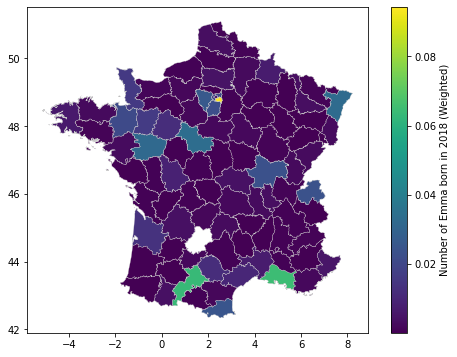

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 6))

merged3.plot(column="nombre",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Number of Emma born in 2018 (Weighted)"})

https://geopandas.org/mapping.html

https://www.insee.fr/fr/statistiques/4265429?sommaire=4265511#documentation-sommaire


il faut ajouter une colonne propdep qui contient le pourcentage de population totale du departement divisé par la population totale francais
francaise
une autre facon de l’énoncer :
donner le nombre de naissance de garçons en plus ou en moins par departement pour 1000 habitants
quand 1000 personnes naissent dans ce departement, combien  ai je de garcons en plus ou en moins
